In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Gershgorin circles</h1>

In [2]:
### Calculates the row or coloumns Gershgorin circles

def Gershgorin_circles(A, row=True):
    n = A.shape[0]
    circles = {}
    
    for i in range(n):
        if row:
            radius = np.sum(np.abs(A[i])) - np.abs(A[i, i])
        else:
            radius = np.sum(np.abs(A[:, i])) - np.abs(A[i, i])
            
        circles[i] = (np.real(A[i, i]), np.imag(A[i, i]), radius)
    
    return circles

In [3]:
### Functions for the plot

def plot_circles(circles, row=True):
    figure, axes = plt.subplots()
    axes.set_aspect(1)
    max_lim = 0
    
    for circle in circles.values():
        max_lim = np.max([max_lim, np.abs(circle[0]) + circle[2], np.abs(circle[1]) + circle[2]])
        circle = plt.Circle((circle[0], circle[1]), circle[2], facecolor=(*np.random.rand(3,), .5))
        axes.add_artist(circle)
    
    plt.xlim(-max_lim, max_lim)
    plt.ylim(-max_lim, max_lim)
    
    if row:
        plt.title('Row Gershgorin Circles')
    else:
        plt.title('Coloumn Gershgorin Circles')
    plt.show()
    
def in_circles(circles, x, y):
    for circle in circles.values():
        dx = circle[0] - x
        dy = circle[1] - y
        
        if np.sqrt(dx**2 + dy**2) <= circle[2]:
            return True
        
    return False

def plot_intersections(c1, c2):
    max_lim = 0
    figure, axes = plt.subplots()
    
    for circle in c1.values():
        x0, y0, R = circle
        
        for i in range(500):
            rho = np.random.rand() * R
            theta = np.random.rand() * 2*np.pi

            x = x0 + rho*np.cos(theta)
            y = y0 + rho*np.sin(theta)
            
            if in_circles(c2, x, y):
                plt.plot(x, y, 'r.')
                
            max_lim = np.max([max_lim, np.abs(x), np.abs(y)])
                
    plt.xlim(-max_lim, max_lim)
    plt.ylim(-max_lim, max_lim)
    axes.set_aspect(1)
    plt.show()

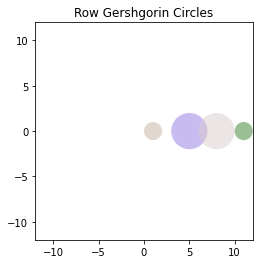

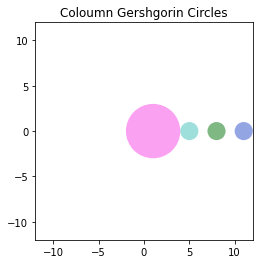

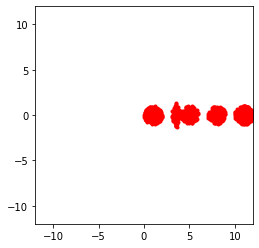

In [4]:
# A = np.array([[-3, 3, 2, 1], [0, 3, 1, 0], [0, 1, -1-1j, 1], [1, 0, 0, -1-2j]])
# A = np.random.rand(3, 3) + np.random.rand(3, 3)*1j

E = np.array([[1,1,0,0], [1,5,1,0], [1,0,8,1], [1,0,0,11]])

row_circles = Gershgorin_circles(E, row=True)
plot_circles(row_circles)

col_circles = Gershgorin_circles(E, row=False)
plot_circles(col_circles, row=False)

plot_intersections(row_circles, col_circles)

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Power method</h1>

### Largest eigenvalue

In [2]:
def power_method(A, x0, tol=0.0001):
    """
    Evaluates the dominant eigenvalue of a matrix and the correspondent eigenvector through power method
    
    Parameters:
        A (numpy array): nxn matrix
        x0 (numpy array): nx1 initial guess
        
    Returns:
        lambda_k (numpy matrix): approximation of the dominant eigenvalue
        x_k (numpy array): nx1 vector, approximation of the eigenvector associated to lambda_k
    """
    
    # Identity matrix
    I = np.eye(A.shape[0])
    
    # Initial guess
    x_k = x0.copy()
    lambda_k = x_k.conjugate().T @ A @ x_k

    while np.linalg.norm((A - lambda_k[0,0]*I) @ x_k) / np.abs(lambda_k) > tol:
        y_k = A @ x_k
        x_k = y_k / np.linalg.norm(y_k)
        lambda_k = x_k.conjugate().T @ A @ x_k
    
    return lambda_k, x_k

### Inverse iteration

In [3]:
def power_method_inverse(A, x0, s=0, tol=0.0001):    
    """
    Evaluates the eigenvalue of A which is closest in absolute value to s and the correspondent 
        eigenvector through inverse power method
    
    Parameters:
        A (numpy array): nxn matrix
        x0 (numpy array): nx1 initial guess
        
    Returns:
        lambda_k (numpy matrix): approximation of the eigenvalue closest to s
        x_k (numpy array): nx1 vector, approximation of the eigenvector associated to lambda_k
    """
    
    # Identity matrix
    I = np.eye(A.shape[0])
    
    # Initial guess
    x_k = x0.copy()
    lambda_k = x_k.conjugate().T @ A @ x_k
    
    # Algorithm
    while np.linalg.norm((A - lambda_k[0,0]*I) @ x_k) / np.abs(lambda_k) > tol:
        y_k = np.linalg.solve(A - s*I, x_k)
        x_k = y_k / np.linalg.norm(y_k)
        lambda_k = x_k.conjugate().T @ A @ x_k
    
    return lambda_k, x_k

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">QR iteration</h1>

In [4]:
def QR_iteration(A, max_iterations=1000):
    """
    Evaluates all the eigenvalues of A through QR iterations
    
    Parameters:
        A (numpy array): nxn real matrix
        
    Returns:
        T (numpy array): nxn upper triangular matrix with the eigenvalues of A on the diagonal
        Q_inf (numpy array): nxn orthogonal matrix, if A is symmetric it's the matrix of eigenvectors
    """
    
    # Initial iteration
    T = A.copy()
    Q_inf = np.eye(A.shape[0])
    
    # Algorithm
    for i in range(max_iterations):
        Q, R = np.linalg.qr(T) 
        T = R @ Q
        
        Q_inf = Q_inf @ Q

    return T, Q_inf

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Testing</h1>

In [7]:
### Matrices

A = np.array([[4, -5],
              [2, 3]])

B = np.array([[0, 11, -5],
             [-2, 17, -7],
             [-4, 26, -10]])

C = np.array([[1, 0.5, -0.5, 0.2],
             [0.5, 12, 0.8, 1],
             [-0.5, 0.8, -16, 1],
             [0.2, 1, 1, -4]])

D = np.array([[2, 0, 0.5, -1],
             [0.5, 7, 6.5, 21],
             [-2, 1, 12, -0.5],
             [0, -0.5, 0, 18]])

In [ ]:
### Power method
matrix = A
n = matrix.shape[0]
x0 = np.ones((n, 1))

print(f'Eigenvalues = {np.linalg.eig(matrix)[0]}')
print(f'Eigenvectors = {np.linalg.eig(matrix)[1]}')
print()
print(f'Max eigenvalue calculated: {power_method(matrix, x0)[0]}')
print(f'Associated eigenvector: {power_method(matrix, x0)[1].reshape(1,n)[0]}')

Eigenvalues = [3.5+3.122499j 3.5-3.122499j]
Eigenvectors = [[0.84515425+0.j         0.84515425-0.j        ]
 [0.08451543-0.52779866j 0.08451543+0.52779866j]]



In [13]:
### Inverse power method
matrix = C
n = matrix.shape[0]
x0 = np.ones((n, 1))
s = -3

print(f'Eigenvalues = {np.linalg.eig(matrix)[0]}')
print(f'Eigenvectors = {np.linalg.eig(matrix)[1]}')
print()
print(f'Eigenvalue closest to s: {power_method_inverse(matrix, x0, s=s)[0]}')
print(f'Associated eigenvector: {power_method_inverse(matrix, x0, s=s)[1].reshape(1,n)[0]}')

Eigenvalues = [ 12.110857   -16.11724096   0.99726676  -3.99088279]
Eigenvectors = [[-0.04465631 -0.03079279 -0.9982063  -0.02533389]
 [-0.9964866   0.02601933  0.04543575 -0.06536853]
 [-0.02985039 -0.99593478  0.03004043  0.07950115]
 [-0.06425904  0.0805525  -0.0248466   0.99436649]]

Eigenvalue closest to s: [[-3.99088278]]
Associated eigenvector: [ 0.02538922  0.06536602 -0.07950283 -0.99436511]


In [11]:
### QR iteration
matrix = C @ C.T
s = 0

print(f'Eigenvalues = {np.linalg.eig(matrix)[0]}')
print(f'Eigenvectors = {np.linalg.eig(matrix)[1]}')
print()
print(f'Eigenvalues calculated: {np.diag(QR_iteration(matrix)[0])}')
    
# If A is symmetric the eigenvectors are the coloumns of Q_inf
if np.allclose(matrix, matrix.T, rtol=1e-8, atol=1e-8):
    print(f'Eigenvectors calculated: {QR_iteration(matrix)[1]}')

Eigenvalues = [259.76545625 146.67285728   0.99454098  15.92714548]
Eigenvectors = [[ 0.03079279  0.04465631 -0.9982063  -0.02533389]
 [-0.02601933  0.9964866   0.04543575 -0.06536853]
 [ 0.99593478  0.02985039  0.03004043  0.07950115]
 [-0.0805525   0.06425904 -0.0248466   0.99436649]]

Eigenvalues calculated: [259.76545625 146.67285728  15.92714548   0.99454098]
Eigenvectors calculated: [[ 0.03079279  0.04465631  0.02533389  0.9982063 ]
 [-0.02601933  0.9964866   0.06536853 -0.04543575]
 [ 0.99593478  0.02985039 -0.07950115 -0.03004043]
 [-0.0805525   0.06425904 -0.99436649  0.0248466 ]]
